## Vamos a generar una piramide de poblacion, importando los datos desde INE, y generando el gráfico con matplotlib

Empezamos importando las librerias necesarias : 

In [44]:
import matplotlib

In [45]:
#from plotly.graph_objs import *

In [46]:
import matplotlib.pyplot as plt

In [47]:
import pandas as pd

In [48]:
import numpy as np

In [49]:
import plotly.graph_objs as go

In [50]:
import plotly.plotly as py

In [51]:
import datetime, requests

con esta lineas le pedimos a matplotlib que nos presente los graficos en este notebook

In [52]:
%matplotlib inline

Generamos un par de plantillas para facilitar la generacion de la URL para atacar el webservice del INE

In [53]:
url_plantilla_Serie = 'http://servicios.ine.es/wstempus/js/ES/DATOS_SERIE/{codigo}?nult={num_datos}'

In [54]:
url_plantilla_Tabla= 'http://servicios.ine.es/wstempus/js/ES/DATOS_TABLA/{codigo}?nult={num_datos}'

En la siguientes lineas se define el código de la query a descargar y el número  de datos que refiere al numero de periodos. Estamos trabajando con un tipo de datos disponible desde el año 200, con dos publicaciones por año, luego con 30/35 seria suficiente..aun asi empece a usar 100 y así lo deje..

In [55]:
codigo = "9663"

In [56]:
num_datos=100

Preparamos el string con el URL correcto con el que solicitar los datos a través del web service de www.ine.es

In [57]:
url = url_plantilla_Tabla.format(codigo=codigo,num_datos=num_datos)

Con la plantilla ya preparada solicitamos la informacion 

In [66]:
respuesta_poblacion = requests.get(url)

Ya la tenemos, y preparamos un pandas con la respuesta en formato json. Seguro que se puede utilizar otros muchos formatos, yo he decidido empezar por json, cuando tenga suficiente destreza probaré con otros formatos.

In [67]:
datos_poblacion=pd.DataFrame(respuesta_poblacion.json())

Jugemos un poco para entender la estructura de la información descargada...

In [68]:
datos_poblacion.loc[[2]]

,COD,Data,FK_Escala,FK_Unidad,Nombre
2,CP300334,"[{'Fecha': 1514761200000, 'FK_TipoDato': 2, 'F...",1,3,Total Nacional. Todas las edades. Mujeres. Pob...


In [69]:
datos_poblacion.columns

Index(['COD', 'Data', 'FK_Escala', 'FK_Unidad', 'Nombre'], dtype='object')

In [70]:
len(datos_poblacion)

324

Vemos que tenemos 324 series de datos...veamos ahora que hay las tres columnas que mas nos importan : COD: como código de esa tabla especifica, Data : campo de datos con los valores correspondientes a esa tabla desde 2002 hasta 2017 y Nombre : nombre de la tabla..

In [71]:
datos_poblacion[['COD','Nombre']]

,COD,Nombre
0,CP335,Total Nacional. Todas las edades. Total. Pobla...
1,CP300335,Total Nacional. Todas las edades. Hombres. Pob...
2,CP300334,Total Nacional. Todas las edades. Mujeres. Pob...
3,CP300333,Total Nacional. 0 años. Total. Población. Núme...
4,CP300332,Total Nacional. 0 años. Hombres. Población. Nú...
5,CP300331,Total Nacional. 0 años. Mujeres. Población. Nú...
6,CP300330,Total Nacional. 1 año. Total. Población. Número.
7,CP300329,Total Nacional. 1 año. Hombres. Población. Núm...
8,CP300328,Total Nacional. 1 año. Mujeres. Población. Núm...
9,CP300327,Total Nacional. 2 años. Total. Población. Núme...


Varios apuntes importantes :
a) En la columna 'Nombre' hay información relevante, pero concatenadas en el string. Tendremos que trabajarla más adelante para extraer esa información. 
b) Las líneas 0,1,2,318,319 y 320 tienen un formato diferente, y no nos dan informacion relevante en este ejercicio asi que he decidido eliminarlas
c) No he incluido la columna Data para facilidad de lectura, aunque podemos ver un ejemplo aqui :

In [72]:
datos_poblacion.drop([0,1,2,318,319,320],inplace=True)

In [73]:
datos_poblacion.loc[[200]]['Data'].values[0]

[{'Anyo': 2018,
  'FK_Periodo': 26,
  'FK_TipoDato': 2,
  'Fecha': 1514761200000,
  'Secreto': False,
  'Valor': 261591.0},
 {'Anyo': 2017,
  'FK_Periodo': 27,
  'FK_TipoDato': 2,
  'Fecha': 1498860000000,
  'Secreto': False,
  'Valor': 254005.0},
 {'Anyo': 2017,
  'FK_Periodo': 26,
  'FK_TipoDato': 1,
  'Fecha': 1483225200000,
  'Secreto': False,
  'Valor': 246553.0},
 {'Anyo': 2016,
  'FK_Periodo': 27,
  'FK_TipoDato': 1,
  'Fecha': 1467324000000,
  'Secreto': False,
  'Valor': 244412.0},
 {'Anyo': 2016,
  'FK_Periodo': 26,
  'FK_TipoDato': 1,
  'Fecha': 1451602800000,
  'Secreto': False,
  'Valor': 242277.0},
 {'Anyo': 2015,
  'FK_Periodo': 27,
  'FK_TipoDato': 1,
  'Fecha': 1435701600000,
  'Secreto': False,
  'Valor': 248047.0},
 {'Anyo': 2015,
  'FK_Periodo': 26,
  'FK_TipoDato': 1,
  'Fecha': 1420066800000,
  'Secreto': False,
  'Valor': 254064.0},
 {'Anyo': 2014,
  'FK_Periodo': 27,
  'FK_TipoDato': 1,
  'Fecha': 1404165600000,
  'Secreto': False,
  'Valor': 260274.0},
 {'Anyo'

La estructura de Data es la de una lista con diccionarios como valores, cada uno de los diccionarios se refiere a un año, en realidad hay dos diccionarios por año correspondientes a las dos publicaciones : Enero y Julio..Las claves de los diccionarios son 'Anyo', FK_Periodo, FK_Tipo_dato, 'Fecha','Secreto' y 'Valor'. La Fecha esta en formato DateTime/TimeStamp, veamos un ejemplo: aqui sacamos al informacion correspondiente al registro #100 y al sexto registro de su 'Data' (indice 5 corresponde a registro sexto) : 

In [74]:
print ('Serie {}\nNombre {}\nAño {}\nFecha {}\nValor {:,.0f}'.format(
                                                    datos_poblacion.loc[[100]]['COD'].values[0],
                                                    datos_poblacion.loc[[100]]['Nombre'].values[0],
                                                    datos_poblacion.loc[[100]]['Data'].values[0][5]['Anyo'],
                                                    datetime.date.fromtimestamp(datos_poblacion.loc[[100]]['Data'].values[0][5]['Fecha']/1000),
                                                    datos_poblacion.loc[[100]]['Data'].values[0][5]['Valor']
                                                )
      )

Serie CP300236
Nombre Total Nacional. 32 años. Hombres. Población. Número. 
Año 2015
Fecha 2015-07-01
Valor 316,996


Esto se lee tal que : la serie CP300236 correspondiente a Total Nacional. 32 añosa Hombre.Poblacion.Numero en su registro sexto , correspondiente al ejercicioo de Julio 2014 nos da una poblacion de 339.003 personas..

y aqui un poco de código para ver por pantalla todos los datos importados. He quitado 3 periodos y he dividido la poblacion por mil para facilitar su vision en pantalla

In [77]:
spliteador_edad = lambda x: x.split('.')[1].split()[0]

spliteador_genero=lambda x: x.split('.')[2].strip()
spliteador_edad_genero=lambda x: [x.split('.')[1].split()[0],x.split('.')[2].strip()]

In [78]:
annyos=list()
for x in datos_poblacion.index:
    print ('\nEdad {} años, genero {}'.format(
           datos_poblacion.loc[[x]]['Nombre'].apply(spliteador_edad).values[0],
           datos_poblacion.loc[[x]]['Nombre'].apply(spliteador_genero).values[0]
          )
          )
    for y in range(0,len(datos_poblacion.loc[[x]]['Data'].values[0])-3):
        if y!=len(datos_poblacion.loc[[x]]['Data'].values[0])-4:
            print ('{:3s} '.format(str(datos_poblacion.loc[[x]]['Data'].values[0][y]['Anyo'])[2:]),end='')   
        else:
            print ('{:3s} '.format(str(datos_poblacion.loc[[x]]['Data'].values[0][y]['Anyo'])[2:]))
    for y in range(0,len(datos_poblacion.loc[[x]]['Data'].values[0])-3):
        print ('{:2.0f} '.format(datos_poblacion.loc[[x]]['Data'].values[0][y]['Valor']/1000),end='')


Edad 0 años, genero Total
18  17  17  16  16  15  15  14  14  13  13  12  12  11  11  10  10  09  09  08  08  07  07  06  06  05  05  04  04  03  
391 396 410 410 419 418 426 420 425 433 453 462 476 475 484 480 494 503 520 503 494 482 484 472 467 456 455 443 443 429 
Edad 0 años, genero Hombres
18  17  17  16  16  15  15  14  14  13  13  12  12  11  11  10  10  09  09  08  08  07  07  06  06  05  05  04  04  03  
202 204 211 211 216 216 220 217 219 223 234 238 245 245 250 248 255 261 268 260 255 249 250 243 240 235 235 228 228 221 
Edad 0 años, genero Mujeres
18  17  17  16  16  15  15  14  14  13  13  12  12  11  11  10  10  09  09  08  08  07  07  06  06  05  05  04  04  03  
190 192 199 199 203 202 206 204 206 210 220 224 231 230 234 232 239 243 251 243 239 233 234 229 227 221 220 214 215 208 
Edad 1 años, genero Total
18  17  17  16  16  15  15  14  14  13  13  12  12  11  11  10  10  09  09  08  08  07  07  06  06  05  05  04  04  03  
416 419 424 426 430 427 426 439 453 464 476 

TypeError: unsupported operand type(s) for /: 'NoneType' and 'int'

Empezemos pues a trabajar los datos para poder generar la Piramide buscada...

En primer lugar generamos un par de funciones auxiliares para poder trabajar el campo 'nombre, que como hemos visto lleva contenadas informacion relevante sobre  el tipo de tabla, la edad, y el género (Hombre/Mujer/Total)

In [84]:
spliteador_edad = lambda x: x.split('.')[1].split()[0]

In [85]:
spliteador_genero=lambda x: x.split('.')[2].strip()

In [86]:
spliteador_edad_genero=lambda x: [x.split('.')[1].split()[0],x.split('.')[2].strip()]

A continuacion vamos a definir un pandas filtrando los valores correspondientes a Genero = Hombre o Mujer, ,es decir Genero diferente de Total ---> !='Total'. A partir de ahí definiremos un par de listas, una para 'Hombres' y otra para 'Mujeres', correspondientes al año 2017. Cada elemento de esas listas contendra a su vez dos campos : edad y valor (población). Me costó llegar a esa lista definida de forma comprensiva, es lo más "pythonico" que he conseguido escribir, pero seguro que hay maneras más elegantes. Posterioremente definimos un par de pandas que "merge" en uno solo que llamamos panda_poblacion. En este tendremos tres columnas : 'Edad', 'Hombres', 'Mujeres'..y estaremos listos para dibujar las gráficas.

In [87]:
df1=datos_poblacion[datos_poblacion['Nombre'].apply(spliteador_genero)!='Total']

In [88]:
dict_poblacion=[[df1.loc[[x]]['Nombre'].apply(spliteador_genero).values[0],int(df1.loc[[x]]['Nombre'].apply(spliteador_edad).values[0]),z['Valor']]
                   for x in df1.index for z in df1.loc[[x]]['Data'].values[0] if z['Anyo']==2017]

In [89]:
lista_hombres=[[int(df1.loc[[x]]['Nombre'].apply(spliteador_edad).values[0]),z['Valor']] 
for x in df1.index if df1.loc[[x]]['Nombre'].apply(spliteador_genero).values[0]=='Hombres' 
for z in df1.loc[[x]]['Data'].values[0] if z['Anyo']==2017]

In [90]:
lista_mujeres=[[int(df1.loc[[x]]['Nombre'].apply(spliteador_edad).values[0]),z['Valor']] 
for x in df1.index if df1.loc[[x]]['Nombre'].apply(spliteador_genero).values[0]=='Mujeres' 
for z in df1.loc[[x]]['Data'].values[0] if z['Anyo']==2017]

In [91]:
panda_hombres=pd.DataFrame(lista_hombres,columns=['Edad','Hombres'])
panda_mujeres=pd.DataFrame(lista_mujeres,columns=['Edad','Mujeres'])

In [92]:
panda_poblacion=pd.merge(panda_hombres,panda_mujeres,on='Edad')

Hacemos un primer intento con una grafica clasica de lineas en la que pintamos poblacion separada de Mujeres y Hombres en función de la edad.

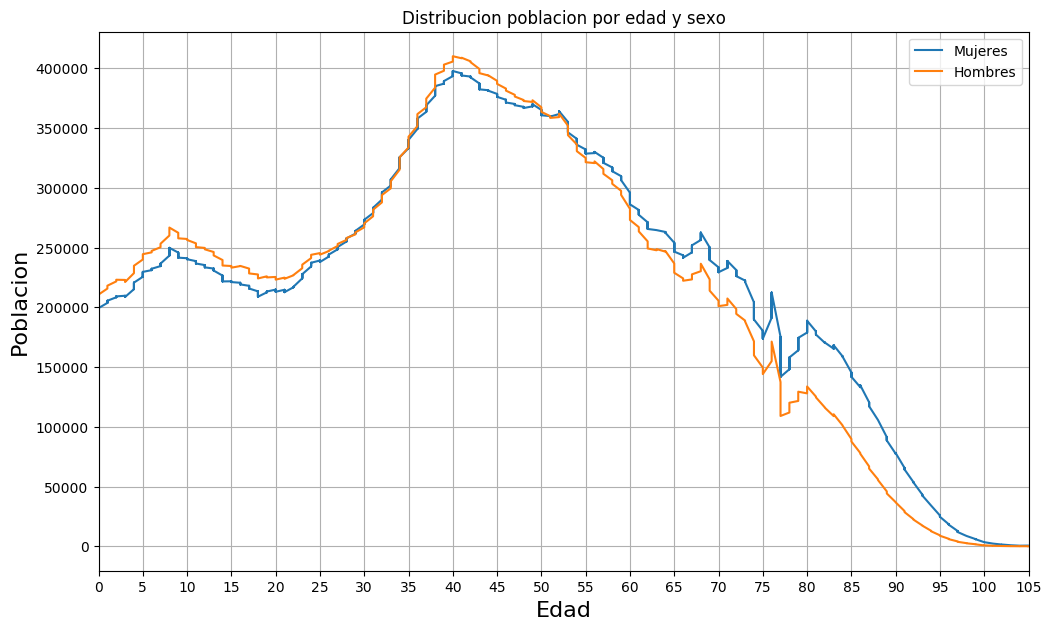

In [99]:
plt.plot(panda_poblacion['Edad'],panda_poblacion['Mujeres'],
         panda_poblacion['Edad'],panda_poblacion['Hombres'])
plt.xlim([0,105])
plt.locator_params(axis='x',nbins=25)
plt.locator_params(axis='y',nbins=10)
plt.xlabel('Edad',size=16)
plt.ylabel('Poblacion',size=16)
plt.grid()
plt.legend(['Mujeres','Hombres'])
plt.title('Distribucion poblacion por edad y sexo')
plt.show()

..y la gráfica con población total : 

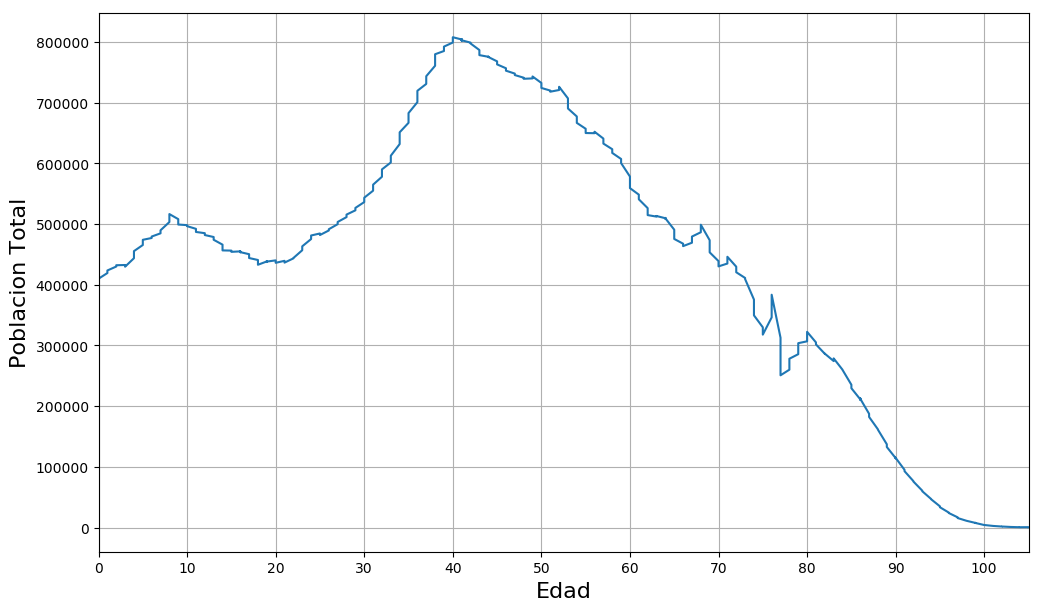

In [100]:
plt.plot(panda_poblacion['Edad'],panda_poblacion['Hombres']+panda_poblacion['Mujeres'])
plt.xlim([0,105])
plt.locator_params(axis='x',nbins=25)
plt.locator_params(axis='y',nbins=10)
plt.xlabel('Edad',size=16)
plt.ylabel('Poblacion Total',size=16)
plt.grid()
plt.xticks([0,10,20,30,40,50,60,70,80,90,100],['0','10','20','30','40','50','60','70','80','90','100'])
plt.show()

Como curiosidad saquemos la edad en la que hay mayor población :

In [95]:
panda_poblacion.loc[[panda_poblacion['Hombres'].idxmax()]]

,Edad,Hombres,Mujeres
162,40,410022.0,393387.0


In [96]:
panda_poblacion.loc[[panda_poblacion['Mujeres'].idxmax()]]

,Edad,Hombres,Mujeres
161,40,405544.0,397654.0


y finalmente sacamos el grafico con la Piramide de poblacion para 2017

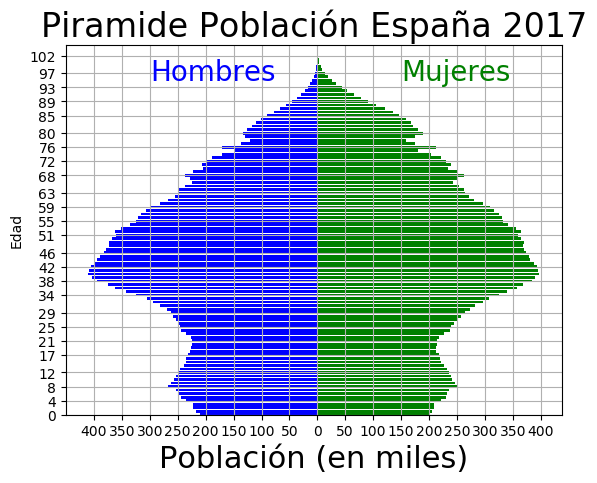

In [102]:
plt.rcdefaults()
fig,ax = plt.subplots()
y_pos = panda_poblacion['Edad']
ax.barh(y_pos, panda_poblacion['Mujeres'], align='center',
        color='green', ecolor='black')
ax.barh(y_pos,-panda_poblacion['Hombres'],align='center',color='blue',ecolor='black')
ax.set_yticks(y_pos)
ax.set_xticks([-400000,-350000,-300000,-250000,-200000,-150000,-100000,-50000,0,
               50000,100000,150000,200000,250000,300000,350000,400000,])
ax.set_xticklabels(['400','350','300','250','200','150','100','50','0'
                    ,'50','100','150','200','250','300','350','400'])
#ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Población (en miles)',size=22)
ax.set_ylabel('Edad')
ax.locator_params(axis='y',nbins=25)
plt.ylim(0,105)
ax.set_title('Piramide Población España 2017',size=24)
ax.grid(True)
plt.text(150000, 95, 'Mujeres',color='green',size=20)
plt.text(-300000,95,'Hombres',color='blue',size=20)
plt.rcParams["figure.figsize"]=[12,7]
plt.show()